In [687]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import numpy
from matplotlib import pyplot
%matplotlib inline

In [688]:
mal_auth_data = pd.read_csv('dataset.csv', index_col=0)

In [689]:
mal_auth_data['social_score'] =  (mal_auth_data['twitter_given']  + mal_auth_data['email_given'] + mal_auth_data['blog_given'])
# mal_auth_data['social_score'] =  (mal_auth_data['twitter_given']  + mal_auth_data['email_given'] + mal_auth_data['blog_given']) + (mal_auth_data['location_given'] + mal_auth_data['owner_is_hireable'])

In [690]:
mal_auth_data.shape

(2123, 19)

In [691]:
mal_auth_data.head()

,login_name,twitter_given,location_given,owner_followers,owner_following,owner_twitter_username,owner_location,star_max,fork_max,subscriber_max,blog_url,blog_given,owner_email,email_given,owner_is_hireable,auth_score,hub_score,total_score,social_score
0,000JustMe,0,0,6,0,NaN,NaN,57,31,6,NaN,0,NaN,0,0,2,0,2,0
1,02gaurav,0,1,9,2,NaN,Banglore,11,3,1,NaN,0,NaN,0,0,0,0,0,0
2,0Chuzz,0,0,19,13,NaN,NaN,2,0,1,NaN,0,NaN,0,0,0,0,0,0
3,0day1day,0,0,117,23,NaN,NaN,1,2,1,NaN,0,NaN,0,0,23,1,24,0
4,0k0le,0,1,12,2,NaN,Seattle,0,0,2,https://www.guidedhacking.com,1,matthewgeiger@securesoftwarealliance.net,1,0,2,0,2,2


In [692]:
mal_auth_data.describe()

,twitter_given,location_given,owner_followers,owner_following,star_max,fork_max,subscriber_max,blog_given,email_given,owner_is_hireable,auth_score,hub_score,total_score,social_score
count,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000
mean,0.200659,0.617522,179.698540,62.982101,76.245878,25.840320,7.447951,0.566180,0.387188,0.280735,7.563825,0.758832,8.322657,1.154027
std,0.400588,0.486107,599.749293,426.624629,399.656587,102.195948,31.207682,0.495718,0.487222,0.449464,11.354291,3.092855,12.260255,0.946404
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,15.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,43.000000,14.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000
75%,0.000000,1.000000,126.000000,45.000000,25.000000,12.000000,4.000000,1.000000,1.000000,1.000000,13.000000,1.000000,14.000000,2.000000
max,1.000000,1.000000,16149.000000,18275.000000,8176.000000,2051.000000,824.000000,1.000000,1.000000,1.000000,100.000000,100.000000,138.000000,3.000000


In [693]:
df=mal_auth_data.copy()
# df['star_max'] = df['star_max'] + .1
# df['fork_max'] = df['fork_max'] + .1
# df['subscriber_max'] = df['subscriber_max'] + .1
# df['auth_score'] = df['auth_score'] + .1
# df['hub_score'] = df['hub_score'] + .1
# df['total_score'] = df['total_score'] + .1
# df['social_score'] = df['social_score'] + .1
# df['owner_followers'] = df['owner_followers'] + .1
# df['owner_following'] = df['owner_following'] + .1
df=df.rename(columns={"star_max": "Max Star Count by the user for any malware repo", 
                      "fork_max": "Max Fork Count by the user for any malware repo",
                      "subscriber_max": "Max Subscriber Count by the user for any malware repo",
                      "auth_score": "Authority Score", "hub_score": "Hub Score", "total_score": "Total Influence Score", "social_score": "Social Score",
                      "owner_followers": "Follower Count", "owner_following": "Following Count"})
df.shape

(2123, 19)

In [694]:
# Majority Repo has low number of stars
# df.hvplot.hist(y='Max Star Count by the user for any malware repo', bins=200, logx=True, xlim=(1, 1020))

In [695]:
# df.hvplot.hist(y='Max Fork Count by the user for any malware repo', bins=100, logx=True, xlim=(1, 1020))

In [696]:
# df.hvplot.hist(y='Max Subscriber Count by the user for any malware repo', bins=200, logx=True, xlim=(1, 1020))

In [697]:
# # After a threshold level (0-10) of star count, fork count increases linearly
# df.hvplot.scatter(x='Max Star Count by the user for any malware repo', y='Max Fork Count by the user for any malware repo', 
#                   logx=True, logy=True, xlim=(1,8000))

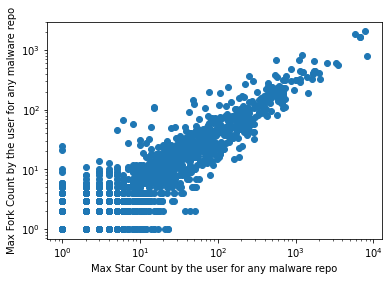

In [698]:
plt.plot(df['Max Star Count by the user for any malware repo'], df['Max Fork Count by the user for any malware repo'], 'o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Max Star Count by the user for any malware repo')
plt.ylabel('Max Fork Count by the user for any malware repo')
plt.savefig('max_star_max_fork.png')
plt.show()

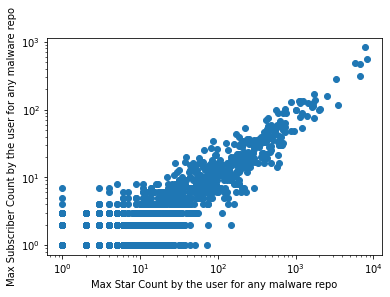

In [699]:
plt.plot(df['Max Star Count by the user for any malware repo'], df['Max Subscriber Count by the user for any malware repo'], 'o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Max Star Count by the user for any malware repo')
plt.ylabel('Max Subscriber Count by the user for any malware repo')
plt.savefig('max_star_max_subscriber.png')
plt.show()

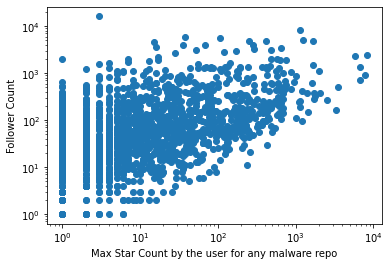

In [700]:
plt.plot(df['Max Star Count by the user for any malware repo'], df['Follower Count'], 'o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Max Star Count by the user for any malware repo')
plt.ylabel('Follower Count')
plt.savefig('max_star_follower_count.png')
plt.show()

In [701]:
# # After a threshold level (0-10) of star count, subscriber count increases linearly
# df.hvplot.scatter(x='Max Star Count by the user for any malware repo', 
#                   y='Max Subscriber Count by the user for any malware repo', logx=True, logy=True, xlim=(1,8000))

In [702]:
# df.hvplot.scatter(x='Authority Score', y='Max Star Count by the user for any malware repo', logx=True, logy=True, xlim=(1,8000))

In [703]:
# df.hvplot.scatter(x='Authority Score', y='Max Fork Count by the user for any malware repo', logx=True, logy=True, xlim=(1,8000))

In [704]:
df_social=df[df['Social Score']>0]
df_social.shape

(1507, 19)

In [705]:
df_unsocial=df[df['Social Score']==0]
df_unsocial.shape

(616, 19)

In [706]:
df_unsocial['Total Influence Score'].head()

0     2
1     0
2     0
3    24
6     2
Name: Total Influence Score, dtype: int64

In [707]:
# # A good number of authors provide social information
# # df['Social Score'] = df['Social Score'] - .1
# df.hvplot.hist(y='Social Score', bins=12, xlabel='Histogram of Social Score', ylabel='Number of authors')

[0 2 1 3]


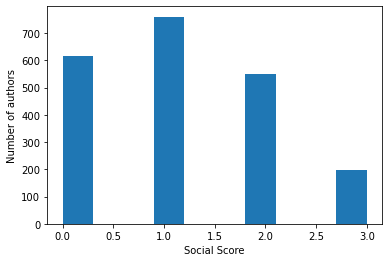

In [708]:
pyplot.hist(df['Social Score'], alpha=1)
pyplot.ylabel('Number of authors')

pyplot.xlabel('Social Score')
print(df['Social Score'].unique())
plt.savefig('histogram_social_score.png')
pyplot.show()

In [709]:
# # High Total Infulence Scores are quite dominant among authors who provide social information compared to those who have not provided
# df_social.hvplot.hist(y='Total Influence Score', bins=200, logx=True, ylim=(0.1, 200), xlim=(1, 100), xlabel='Total Influence Score in Malware Group (Social Score > 0)',
#                      ylabel='Number of authors')

In [710]:
# df_unsocial.hvplot.hist(y='Total Influence Score', logx=True, ylim=(0.1, 450), xlim=(1, 100), xlabel='Total Influence Score in Malware Group (Social Score == 0)',
#                        ylabel='Number of authors')

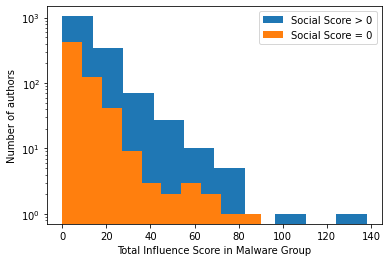

In [711]:
pyplot.hist(df_social['Total Influence Score'], alpha=1, label='Social Score > 0')
pyplot.hist(df_unsocial['Total Influence Score'], alpha=1, label='Social Score = 0')
pyplot.ylabel('Number of authors')
pyplot.legend(loc='upper right')

pyplot.xlabel('Total Influence Score in Malware Group')
pyplot.yscale('log')

plt.savefig('total_influence_score_social_score.png')
pyplot.show()

In [712]:
# # Authors who provided Social Information have higher star distribution
# df_social.hvplot.hist(y='Max Star Count by the user for any malware repo', bins=200, logx=True, xlim=(10,2000), ylim=(0,1500), 
#                       xlabel="Social Score > 0", ylabel= 'Number of authors')

In [713]:
# # Authors who have not provided Social Information have lower star distribution
# df_unsocial.hvplot.hist(y='Max Star Count by the user for any malware repo', bins=200, logx=True, xlim=(10,2000), ylim=(0,1500), 
#                         xlabel="Social Score = 0", ylabel= 'Number of authors')

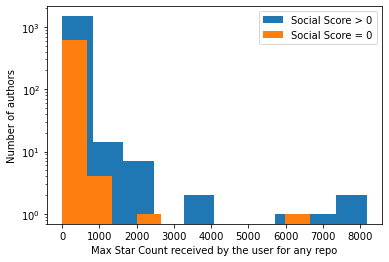

In [714]:
pyplot.hist(df_social['Max Star Count by the user for any malware repo'], alpha=1, label='Social Score > 0')
pyplot.hist(df_unsocial['Max Star Count by the user for any malware repo'], alpha=1, label='Social Score = 0')
pyplot.ylabel('Number of authors')
pyplot.legend(loc='upper right')

pyplot.xlabel('Max Star Count received by the user for any repo')
pyplot.yscale('log')

plt.savefig('social_unsocial_max_star.png')
pyplot.show()

In [715]:
# # After specific threshold of Authority Score, the more authority score an author has, the more follower he/she can get
# df_social.hvplot.scatter(x='Total Influence Score', y='Follower Count', logx=True, logy=True, xlabel='Total Influence Score in Malware Group')

In [716]:
# df_unsocial.hvplot.scatter(x='Authority Score', y='Follower Count', logx=True, logy=True, xlabel='Authority Score (Social Info not Given)')

In [717]:
# df_social.hvplot.scatter(x='Authority Score', y='Following Count', logx=True, logy=True)

In [718]:
# df_unsocial.hvplot.scatter(x='Authority Score', y='Following Count', logx=True, logy=True)

In [719]:
# # The more hub score (after some threshold) an author has, the more following count he/she may have. So coummunity has significance in follower/following count
# df_social.hvplot.scatter(x='Hub Score', y='Following Count', logx=True, logy=True)

In [720]:
# df_unsocial.hvplot.scatter(x='Hub Score', y='Following Count', logx=True, logy=True)

In [721]:
# df.hvplot.scatter(x='Follower Count', y='Max Star Count by the user for any malware repo', logx=True, logy=True)

In [722]:
# df.hvplot.scatter(x='Follower Count', y='Max Fork Count by the user for any malware repo', logx=True, logy=True)

In [723]:
# df.hvplot.scatter(x='Follower Count', y='Max Subscriber Count by the user for any malware repo', logx=True, logy=True)

In [724]:
# # minimum=df['Follower Count'].min()
# # maximum=df['Follower Count'].max()
# # df['Follower Count']=df['Follower Count'].apply(lambda val: (val-minimum)/(maximum-minimum))
    

# df.hvplot.scatter(x='Authority Score', y='Follower Count', logx=True, logy=True)

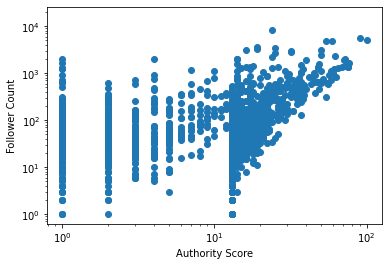

In [725]:
plt.plot(df['Authority Score'], df['Follower Count'], 'o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Authority Score')
plt.ylabel('Follower Count')
plt.savefig('authority_score_follower_count.png')
plt.show()

In [726]:
# # The more hub score (after some threshold) an author has, the more following count he/she may have. So coummunity has significance in follower/following count
# df.hvplot.scatter(x='Hub Score', y='Following Count', logx=True, logy=True)

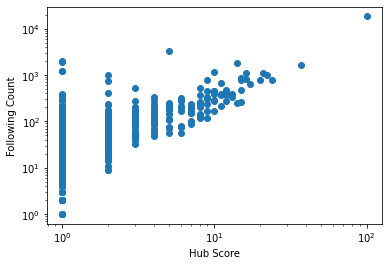

In [727]:
plt.plot(df['Hub Score'], df['Following Count'], 'o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Hub Score')
plt.ylabel('Following Count')
plt.savefig('hub_score_following_count.png')
plt.show()

In [728]:
# # After specific threshold of Authority Score, the more authority score an author has, the more follower he/she can get
# df.hvplot.scatter(x='Authority Score', y='Follower Count', logx=True, logy=True, xlabel='Authority Score in Malware Group')

In [729]:
# # After specific threshold of Authority Score, the more authority score an author has, the more follower he/she can get
# df.hvplot.scatter(x='Hub Score', y='Following Count', logx=True, logy=True, xlabel='Hub Score in Malware Group')

In [730]:
df_email=df[df['email_given'] == 1]

df_email.shape


(822, 19)

In [731]:
df_noemail=df[df['email_given'] == 0]
df_noemail.shape

(1301, 19)

In [732]:
df_blog=df[df['blog_given'] == 1]

df_blog.shape

(1202, 19)

In [733]:
df_blog=df[df['blog_given'] == 0]

df_blog.shape

(921, 19)

In [734]:
df_twitter=df[df['twitter_given'] == 1]

df_twitter.shape

(426, 19)

In [735]:
df_twitter=df[df['twitter_given'] == 0]

df_twitter.shape

(1697, 19)

In [740]:
df_twitter_email=df[ (df['twitter_given'] == 1) & (df['email_given'] == 1) ]

df_twitter_email.shape

(221, 19)

In [741]:
df_twitter_email=df[ (df['twitter_given'] == 1) & (df['blog_given'] == 1) ]

df_twitter_email.shape

(348, 19)

In [742]:
df_twitter_email=df[ (df['blog_given'] == 1) & (df['email_given'] == 1) ]

df_twitter_email.shape

(570, 19)

In [743]:
df_twitter_email=df[ (df['blog_given'] == 1) & (df['email_given'] == 1)  & (df['twitter_given'] == 1) ]

df_twitter_email.shape

(196, 19)